In [503]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

In [504]:
A=yf.download("AMD",start="2016-01-01", end="2023-01-30")
B=yf.download("NVDA",start="2016-01-01", end="2023-01-30")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [505]:
A['return']=A['Adj Close'].pct_change()
B['return']=B['Adj Close'].pct_change()

<AxesSubplot:xlabel='Date'>

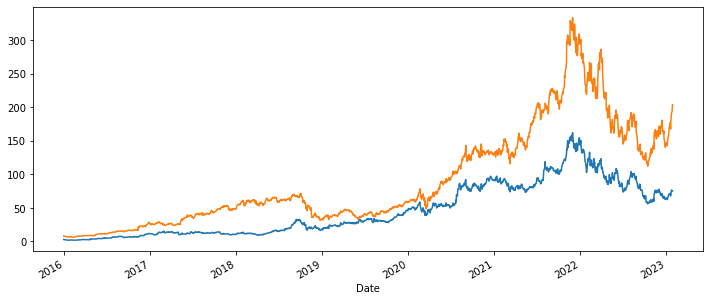

In [506]:
A['Adj Close'].plot(figsize=(12,5))
B['Adj Close'].plot(figsize=(12,5))

<AxesSubplot:xlabel='Date'>

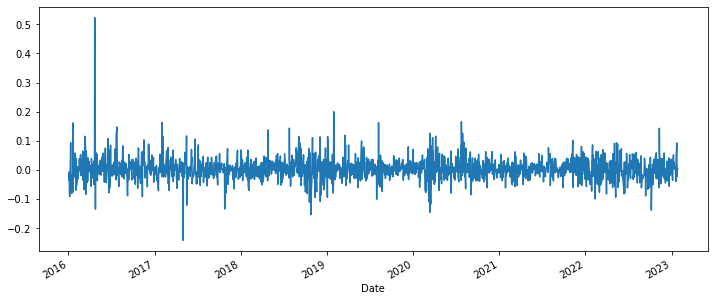

In [507]:
A['return'].plot(figsize=(12,5))

In [508]:
A.dropna(inplace=True)
B.dropna(inplace=True)
adf_result_A=adfuller(A['Adj Close'])
adf_result_B=adfuller(B['Adj Close'])
adf_result_A_r=adfuller(A['return'])
adf_result_B_r=adfuller(B['return'])
print ('TSM "close" ADF Statistics: %f' %adf_result_A[0])
print ('TSM "close" ADF pvalue: %f' %adf_result_A[1])
print ('B "close" ADF Statistics: %f' %adf_result_AMD[0])
print ('B "close" ADF pvalue: %f' %adf_result_AMD[1])
print ('---------')
print ('TSM "return" ADF Statistics: %f' %adf_result_A_r[0])
print ('TSM "return" ADF pvalue: %f' %adf_result_A_r[1])
print ('B "return" ADF Statistics: %f' %adf_result_AMD_r[0])
print ('B "return" ADF pvalue: %f' %adf_result_AMD_r[1])

TSM "close" ADF Statistics: -1.184375
TSM "close" ADF pvalue: 0.680281
B "close" ADF Statistics: 0.306080
B "close" ADF pvalue: 0.977622
---------
TSM "return" ADF Statistics: -25.187755
TSM "return" ADF pvalue: 0.000000
B "return" ADF Statistics: -31.926360
B "return" ADF pvalue: 0.000000


<AxesSubplot:xlabel='Date'>

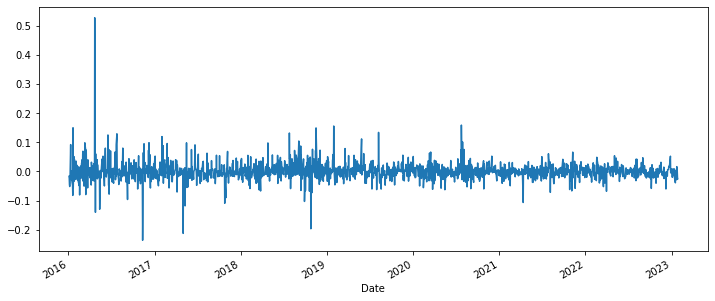

In [509]:
diff_AB=A['return']-B['return']
diff_AB.plot(figsize=(12,5))

In [510]:
B

,Open,High,Low,Close,Adj Close,Volume,return
Date,,,,,,,
2016-01-04,8.072500,8.145000,8.010000,8.092500,7.899906,35807600,-0.017900
2016-01-05,8.245000,8.360000,8.125000,8.222500,8.026814,49027200,0.016064
2016-01-06,8.087500,8.125000,7.790000,7.882500,7.694904,44934400,-0.041350
2016-01-07,7.685000,7.737500,7.470000,7.570000,7.389842,64530400,-0.039645
2016-01-08,7.667500,7.675000,7.392500,7.407500,7.231209,39847200,-0.021466
...,...,...,...,...,...,...,...
2023-01-23,180.639999,192.449997,178.179993,191.929993,191.835892,65516300,0.075901
2023-01-24,188.270004,194.949997,188.199997,192.649994,192.555527,49620400,0.003751
2023-01-25,189.130005,193.699997,185.800003,193.229996,193.135239,44953700,0.003011


<AxesSubplot:xlabel='Adj Close_A', ylabel='Adj Close_B'>

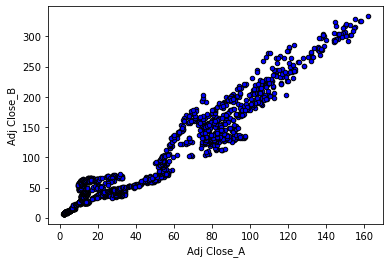

In [511]:
A['year'] = A.index.year
B['year'] = B.index.year
A['group'] = pd.cut(A['year'], bins=[-float("inf"), 2012, 2014,2016,2018,2020, float("inf")], labels=[1, 2, 3,4,5,6])
B['group'] = pd.cut(B['year'], bins=[-float("inf"), 2012, 2014,2016,2018,2020, float("inf")], labels=[1, 2, 3,4,5,6])
B_data=B[['return','Adj Close','group','year']]
A_data=A[['return','Adj Close','group','year']]
merged_df = pd.merge(A_data, B_data, on='Date', suffixes=('_A', '_B'))
cor_data=merged_df[['Adj Close_A','Adj Close_B','group_B','year_B']]
cor_data.plot.scatter(x='Adj Close_A', y='Adj Close_B', color='blue', marker='o', edgecolor='black')

In [512]:
cor_data

,Adj Close_A,Adj Close_B,group_B,year_B
Date,,,,
2016-01-04,2.770000,7.899906,3,2016
2016-01-05,2.750000,8.026814,3,2016
2016-01-06,2.510000,7.694904,3,2016
2016-01-07,2.280000,7.389842,3,2016
2016-01-08,2.140000,7.231209,3,2016
...,...,...,...,...
2023-01-23,76.529999,191.835892,6,2023
2023-01-24,74.699997,192.555527,6,2023
2023-01-25,74.910004,193.135239,6,2023


In [513]:
corr_AB=cor_data.groupby('year_B')[['Adj Close_A','Adj Close_B']].corr().iloc[0::2,-1]
df_corr_AB = pd.DataFrame(corr_AB.items(), columns=['year_B', 'corr_AB'])
df_corr_AB = df_corr_AB['corr_AB']
df_corr_AB

0    0.971503
1   -0.186711
2    0.157752
3    0.793419
4    0.936658
5    0.941942
6    0.922828
7    0.960917
Name: corr_AB, dtype: float64

In [514]:
count_corr_gt_07 = (df_corr_AB.gt(0.7).sum()+df_corr_AB.lt(-0.7).sum())/df_corr_AB.count()
print('Percentage of high correlation from 2010-2022: %f' %count_corr_gt_07 )

Percentage of high correlation from 2010-2022: 0.750000


In [515]:
def plot_scatter_series(df):
    df.plot.scatter(x=0, y=1, title="Scatterplot")
    plt.show()
    
def create_residuals(df):

    Y = df['Adj Close_A']
    x = df['Adj Close_B']
    x = sm.add_constant(x)
    model = sm.OLS(Y, x)
    res = model.fit()
    
    # Beta hedge ratio (coefficent from OLS)
    beta_hr = res.params[1]
    print(f'Beta Hedge Ratio: {beta_hr}')
    
    # Residuals
    df["Residuals"] = res.resid
    #alpha,beta
    alpha=res.params[0]
    beta=res.params[1]
    errors=Y-(alpha+df['Adj Close_B']*beta)
    print(f'error: {errors}')

def create_cadf(df):
    cadf = ts.adfuller(df["Residuals"])
    print(f'CADF:{cadf[0]}')
    print(f'pvalue:{cadf[1]}')
    print(f'criticalvalue:{cadf[4]}')

def plot_residuals(df):
    plt.figure()
    df.plot(y="Residuals", title="Residual Plot", figsize=(8.6, 5.3))
    plt.ylabel("Price($)")
    plt.show()

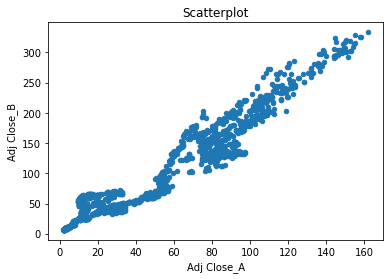

In [516]:
df=cor_data[['Adj Close_A','Adj Close_B']]
plot_scatter_series(df)

In [517]:
create_residuals(df)

Beta Hedge Ratio: 0.5012903155781309
error: Date
2016-01-04    -1.987499
2016-01-05    -2.071116
2016-01-06    -2.144734
2016-01-07    -2.221809
2016-01-08    -2.282287
                ...    
2023-01-23   -20.432828
2023-01-24   -22.623576
2023-01-25   -22.704174
2023-01-26   -24.854180
2023-01-27   -27.435057
Length: 1780, dtype: float64


/Users/tonywu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/var/folders/fj/g5rgz0_j4wj1zbz0tr6xdmrh0000gn/T/ipykernel_13811/2093609652.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Residuals"] = res.resid


In [518]:
create_cadf(df)

CADF:-1.9692489357235154
pvalue:0.3002169556336237
criticalvalue:{'1%': -3.434064603985686, '5%': -2.8631807909644835, '10%': -2.5676435072642447}


<Figure size 432x288 with 0 Axes>

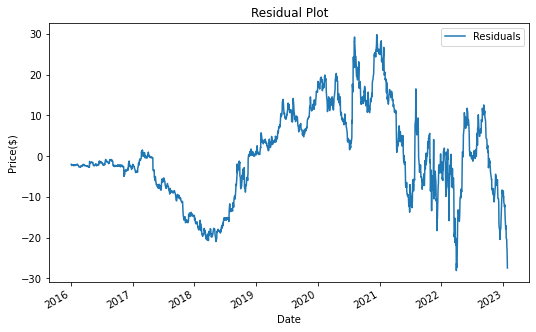

In [519]:
plot_residuals(df)

In [520]:
spread= errors
zscore=(spread-np.mean(spread))/np.std(spread)

/Users/tonywu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/var/folders/fj/g5rgz0_j4wj1zbz0tr6xdmrh0000gn/T/ipykernel_13811/110709745.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Residuals"] = res.resid


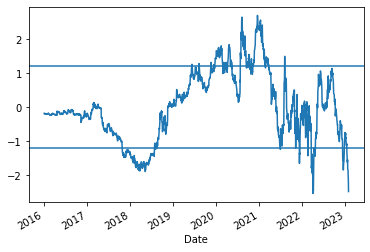

In [521]:
Y = df['Adj Close_A']
x = df['Adj Close_B']
x = sm.add_constant(x)
model = sm.OLS(Y, x)
res = model.fit()
beta_hr = res.params[1]
df["Residuals"] = res.resid
alpha=res.params[0]
beta=res.params[1]
errors=Y-(alpha+df['Adj Close_B']*beta)
spread=errors
zscore=(spread-np.mean(spread))/np.std(spread)
zscore.plot()
plt.axhline(y=1.2)
plt.axhline(y=-1.2)

In [522]:
signal_entry= 1.2
signal_exit= 0

btest=pd.DataFrame()
btest['stockA']=cor_data['Adj Close_A']
btest['stockB']=cor_data['Adj Close_B']
btest['zscore']=zscore
btest['short_signal']= (zscore>signal_entry)&(zscore.shift(1)<signal_entry)
btest['short_exit']= (zscore<signal_exit)&(zscore.shift(1)>signal_exit)
btest['long_signal']= (zscore< -signal_entry)&(zscore.shift(1)> -signal_entry)
btest['long_exit']= (zscore> -signal_exit)&(zscore.shift(1)< -signal_exit)
btest

,stockA,stockB,zscore,short_signal,short_exit,long_signal,long_exit
Date,,,,,,,
2016-01-04,2.770000,7.899906,-0.180146,False,False,False,False
2016-01-05,2.750000,8.026814,-0.187725,False,False,False,False
2016-01-06,2.510000,7.694904,-0.194397,False,False,False,False
2016-01-07,2.280000,7.389842,-0.201383,False,False,False,False
2016-01-08,2.140000,7.231209,-0.206865,False,False,False,False
...,...,...,...,...,...,...,...
2023-01-23,76.529999,191.835892,-1.852017,False,False,False,False
2023-01-24,74.699997,192.555527,-2.050585,False,False,False,False
2023-01-25,74.910004,193.135239,-2.057890,False,False,False,False


In [523]:
spread_side=None; counter=-1
backtest_result=[];indicator=0
for time,signals_stock in btest.iterrows():
    counter+=1
    stockA_, stockB_,short_signal,zscore,short_exit, long_signal, long_exit=signals_stock
    
    if spread_side ==None:
        return_stockA= 0.
        return_stockB=0.
        backtest_result.append([time,return_stockA,return_stockB,spread_side])
        
        if short_signal==True:
            spread_side = "short"
        elif long_signal== True:
            spread_side = "long"
            
    elif spread_side =="long":
        return_stockA = btest["stockA"][counter]/btest["stockA"][counter-1]-1.
        return_stockB = btest["stockB"][counter]/btest["stockB"][counter-1]-1.
        backtest_result.append([time,return_stockA,-return_stockB,spread_side])
        
        if long_exit==True:
            spread_side = None
            
    elif spread_side =="short":
        return_stockA = btest["stockA"][counter]/btest["stockA"][counter-1]-1.
        return_stockB = btest["stockB"][counter]/btest["stockB"][counter-1]-1.
        backtest_result.append([time,-return_stockA,return_stockB,spread_side])
        
    if short_exit==True:
        spread_side = None    


In [524]:
backtest_pandas

,Date,stockA,stockB,side,stockA PL,stockB PL,Total PL
Date,,,,,,,
2016-01-04,2016-01-04,0.000000,0.000000,None,1.000000,1.000000,1.000000
2016-01-05,2016-01-05,0.000000,0.000000,None,1.000000,1.000000,1.000000
2016-01-06,2016-01-06,0.000000,0.000000,None,1.000000,1.000000,1.000000
2016-01-07,2016-01-07,0.000000,0.000000,None,1.000000,1.000000,1.000000
2016-01-08,2016-01-08,0.000000,0.000000,None,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...
2023-01-23,2023-01-23,0.092194,-0.075901,long,2.157464,1.410604,1.784034
2023-01-24,2023-01-24,-0.023912,-0.003751,long,2.105875,1.405312,1.755594
2023-01-25,2023-01-25,0.002811,-0.003011,long,2.111795,1.401081,1.756438


<AxesSubplot:xlabel='Date'>

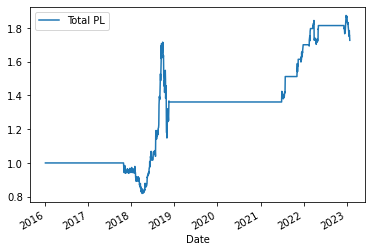

In [526]:

backtest_pandas=pd.DataFrame(backtest_result)
backtest_pandas.columns=["Date","stockA","stockB","side"]
backtest_pandas["stockA PL"]=np.cumprod(backtest_pandas["stockA"]+1.)
backtest_pandas["stockB PL"]=np.cumprod(backtest_pandas["stockB"]+1.)
backtest_pandas["Total PL"]=(backtest_pandas["stockA PL"]+backtest_pandas["stockB PL"])/2.
backtest_pandas.index = backtest_pandas["Date"]

backtest_pandas[["Total PL"]].plot()